In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
time.sleep(0.2)

# Домашнее задание к лекции "Основы веб-скрапинга и работы с API"

## Задание 1.

### Обязательная часть

Будем парсить страницу со свежеми новостям на habr.com/ru/all/.

Вам необходимо собирать только те статьи, в которых встречается хотя бы одно требуемое ключевое слово. Эти слова определяем в начале кода в переменной, например:

In [2]:
URL = 'http://habr.com/ru/all/'

#params_query = {
#    'target_type': 'posts',
#    'q':  ['python', 'парсинг']
#}

params_query = {
    'q':  ['python', 'парсинг']
}

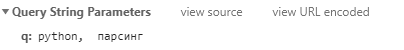

**Что-то у меня с параметрами не так, статьи не совпадают с теми, которые появляются через ручной поиск через сайт**

In [5]:
# посты со всех страниц

def get_all_links(url, parameters, pages):
    all_refs = []
    params = parameters

    for i in range(pages):
        params['page'] = i + 1
        req = requests.get(URL, params)
        time.sleep(0.3)
        soup = BeautifulSoup(req.text, 'html.parser')
        post_blocks = soup.find_all('article', class_='post post_preview')

        # добираемся до текста со ссылкой
        # функция find ищет первый тег который соответсвует нашим критериям
        post_intro = list(map(lambda x: x.find('h2', class_='post__title'), post_blocks))
        a_list = list(map(lambda x: x.find('a').get('href'), post_intro))
        return a_list

all_links = get_all_links(URL, params_query, 10)
all_links

['https://habr.com/ru/company/vdsina/blog/513942/',
 'https://habr.com/ru/post/513062/',
 'https://habr.com/ru/company/ua-hosting/blog/514068/',
 'https://habr.com/ru/post/514148/',
 'https://habr.com/ru/company/smart_start/blog/514160/',
 'https://habr.com/ru/post/514152/',
 'https://habr.com/ru/post/514164/',
 'https://habr.com/ru/post/514162/',
 'https://habr.com/ru/post/514154/',
 'https://habr.com/ru/post/514144/',
 'https://habr.com/ru/company/lamptest/blog/514034/',
 'https://habr.com/ru/post/513964/',
 'https://habr.com/ru/company/ruvds/blog/514138/',
 'https://habr.com/ru/post/514140/',
 'https://habr.com/ru/company/mailru/blog/513356/',
 'https://habr.com/ru/post/514136/',
 'https://habr.com/ru/post/514134/',
 'https://habr.com/ru/company/otus/blog/514132/',
 'https://habr.com/ru/company/dins/blog/514126/',
 'https://habr.com/ru/company/dodopizzadev/blog/511664/']

In [6]:
# вытащим дату и название статьи

# запишем данные в датафрейм
habr_posts = pd.DataFrame()

for link in all_links:
    soup = BeautifulSoup(requests.get(link).text, 'html.parser')   
    date = pd.to_datetime(soup.find('span', class_='post__time').get('data-time_published'), dayfirst=True).date()
    title = soup.find('h1', class_='post__title post__title_full').text
    row = {'date': date, 'title': title, 'link': link}
    habr_posts = pd.concat([habr_posts, pd.DataFrame([row])]) 

In [7]:
habr_posts

,date,link,title
0,2020-08-07,https://habr.com/ru/company/vdsina/blog/513942/,"\nСамые дорогие SaaS компании в B2B, B2C секто..."
0,2020-08-07,https://habr.com/ru/post/513062/,\nВызываем конструктор базового типа в произво...
0,2020-08-07,https://habr.com/ru/company/ua-hosting/blog/51...,\nОт свечей до зеленой энергии: использование ...
0,2020-08-07,https://habr.com/ru/post/514148/,\nКамера RICOH Theta Z1 — панорамная съёмка на...
0,2020-08-07,https://habr.com/ru/company/smart_start/blog/5...,"\nLagniappe — это такое луизианское словечко, ..."
0,2020-08-07,https://habr.com/ru/post/514152/,"\nМои пожелания к СУБД будущего, а также к Рос..."
0,2020-08-06,https://habr.com/ru/post/514164/,\nАрхитектура системы и Бизнес-архитектура\n
0,2020-08-06,https://habr.com/ru/post/514162/,\nВзаимодействие агента и среды — путь к ОИИ\n
0,2020-08-06,https://habr.com/ru/post/514154/,\nУспешный запуск. Гражданский спутник ДЗЗ выс...
0,2020-08-06,https://habr.com/ru/post/514144/,\nВырезаем SSR и ускоряем Хабр в 10 раз\n


### Дополнительная часть (необязательная)

Улучшить скрипт так, чтобы он анализировал не только preview-информацию статьи, но и весь текст статьи целиком.

Для этого потребуется получать страницы статей и искать по тексту внутри этой страницы.

Итоговый датафрейм формировать со столбцами: <дата> - <заголовок> - <ссылка> - <текст статьи>

In [99]:
habr_posts_with_text = pd.DataFrame()

for link in all_links:    
    soup = BeautifulSoup(requests.get(link).text, 'html.parser')   
    date = pd.to_datetime(soup.find('span', class_='post__time').get('data-time_published'), dayfirst=True).date()
    title = soup.find('h1', class_='post__title post__title_full').text
    text = soup.find('div', class_='post__body post__body_full').text
    row = {'date': date, 'title': title, 'link': link, 'text': text}
    habr_posts_with_text = pd.concat([habr_posts_with_text, pd.DataFrame([row])]) 

habr_posts_with_text

,date,link,text,title
0,2020-08-06,https://habr.com/ru/company/southbridge/blog/5...,\n\nВ этой статье будет история об одной весьм...,\nЗачем нужно держать клетки в зоопарке закрыт...
0,2020-08-06,https://habr.com/ru/post/514106/,\nЖизненный опыт даёт нам радость только тогда...,"\nБудучи фрилансером. Мой путь, борьба и реком..."
0,2020-08-06,https://habr.com/ru/company/trendmicro/blog/51...,\nОхватившая все страны опасная инфекция уже п...,\nЛечение или профилактика: как справиться с п...
0,2020-08-06,https://habr.com/ru/company/southbridge/blog/5...,"\nСегодня я планирую рассказать, как нужно пис...",\nТребования к разработке приложения в Kuberne...
0,2020-08-06,https://habr.com/ru/post/514100/,\n\nОдноранговая сеть или проще P2P сеть — это...,\nПростой P2P сервер на python\n
0,2020-08-06,https://habr.com/ru/company/habr/blog/514048/,"\n\n\r\nВодка и шампанское, огонь и лёд, физик...",\nВебкаст Хабр ПРО #5. Техноавтор: эксперт vs ...
0,2020-08-06,https://habr.com/ru/company/badoo/blog/514094/,\n\nВ Gradle — системе автоматической сборки —...,\nКомпозитная сборка как альтернатива buildSrc...
0,2020-08-06,https://habr.com/ru/company/alfa/blog/513506/,\nВ начале июня мы запустили Alfa Battle для J...,"\nAlfa Battle — как это было, запись конференц..."
0,2020-08-06,https://habr.com/ru/post/514008/,"\nМощность современных процессоров растёт, как...",\nСэмулируй сборку приложения ARM на x86 проце...
0,2020-08-06,https://habr.com/ru/company/nixys/blog/514098/,"\n\nПонятие DevOps знакомо многим, но в своей ...",\nС чего начать DevOps?\n


##  Задание 2.

### Обязательная часть
Написать скрипт, который будет проверять список e-mail адресов на утечку при помощи сервиса Avast Hack Ckeck. Список email-ов задаем переменной в начале кода:

In [28]:
import json

In [163]:
emails = ['tischa.tascha@gmail.com', 'marina88@gmail.com']
leak_url = 'https://digibody.avast.com/v1/web/leaks' 

В итоге должен формироваться датафрейм со столбцами: <почта> - <дата утечки> - <источник утечки> - <описание утечки>.

**P.S. я долго сидела над форматом даты, но так и не смогла перевести ее в нормальный формат**

In [168]:
json_response = []
email_leaks = pd.DataFrame()

for i in range(len(emails)):
    
    # итерация по имейлам
    payload = {'email': emails[i]}  
    
    # привести инпут к json формату 
    r = requests.post(leak_url, json=payload)
    json_response = r.json()
    
    # берем только нужную нам инфу
    leaks = json_response['value']
    
    for leak in leaks:    
        row = {'username': leak['username'], 'date': leak['leak_date'], 'source': leak['leak_info']['title'], 'description': leak['leak_info']['description']}    
        email_leaks = pd.concat([email_leaks, pd.DataFrame([row])]) 
        
print(email_leaks)

            date                                        description  \
0  1549411200000  On January 7, 2019, an online user named Sanix...   
0  1593043200000  At an unconfirmed date, this "Cash Cloud" Comb...   
0  1560384000000  In May 2019, graphic-design site Canva's datab...   
0  1535068800000  In 2018, education tech company Chegg's databa...   
0  1548720000000  On January 7, 2019, an online user named Sanix...   
0  1557964800000  In June 2018, fast-fashion retailer Shein's da...   
0  1548374400000  On January 7, 2019, an online user named Sanix...   
0  1513900800000  The proliferation of stolen or leaked database...   
0  1535068800000  This combolist was compiled from a variety of ...   
0  1549411200000  On January 7, 2019, an online user named Sanix...   
0  1593043200000  At an unconfirmed date, this "Cash Cloud" Comb...   
0  1507507200000  The proliferation of stolen or leaked database...   
0  1490918400000  In January 2016, Onverse's user database was b...   
0  149

### Дополнительная часть (необязательная)

Написать скрипт, который будет получать 50 последних постов указанной группы во Вконтакте.
Документация к API VK: https://vk.com/dev/methods , вам поможет метод wall.getGROUP = 'netology'
TOKEN = УДАЛЯЙТЕ В ВЕРСИИ ДЛЯ ПРОВЕРКИ, НА GITHUB НЕ ВЫКЛАДЫВАТЬ

В итоге должен формироваться датафрейм со столбцами: <дата поста> - <текст поста>.